In [10]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


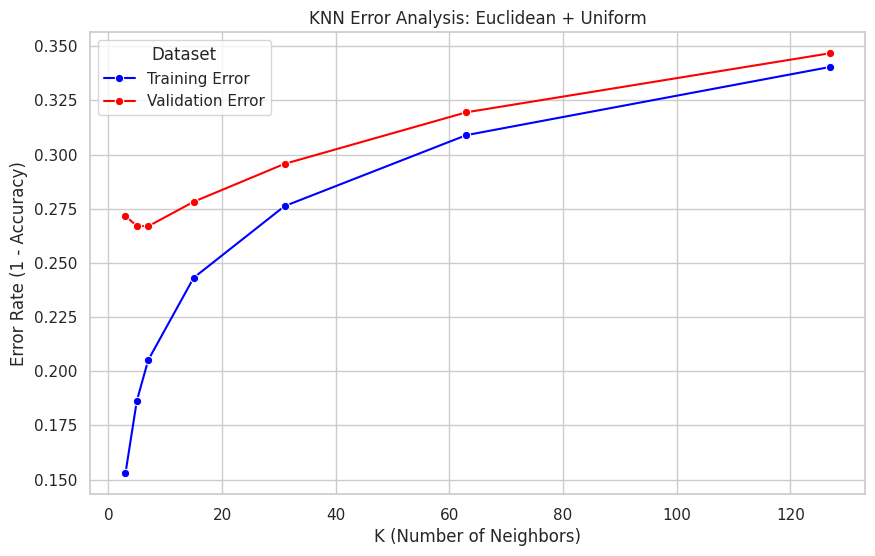

In [7]:

# 1. Caricamento Dati
with open('../../models/tuning/knn_tuning.json', 'r') as f:
    data = json.load(f)

# 2. Estrazione e Filtraggio (Metric: Euclidean, Weights: Distance)
# Calcoliamo Errore = 1 - Mean Score
parsed_data = []
for entry in data['all_combinations']:
    params = entry['params']
    if params['metric'] == 'euclidean' and params['weights'] == 'uniform':
        parsed_data.append({
            'K': params['n_neighbors'],
            'Training Error': 1 - entry['mean_train_score'],
            'Validation Error': 1 - entry['mean_test_score']
        })

# 3. Creazione DataFrame e Reshape per Seaborn
df = pd.DataFrame(parsed_data)
# Melt trasforma le colonne in righe per permettere a Seaborn di gestire la legenda (hue)
df_melted = df.melt(id_vars='K', var_name='Dataset', value_name='Error Rate')

# 4. Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_melted, 
    x='K', 
    y='Error Rate', 
    hue='Dataset', 
    marker='o',
    palette=['blue', 'red'] # Train=Blue, Val=Red (standard convenzionale)
)

plt.title('KNN Error Analysis: Euclidean + Uniform')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xlabel('K (Number of Neighbors)')
plt.show()

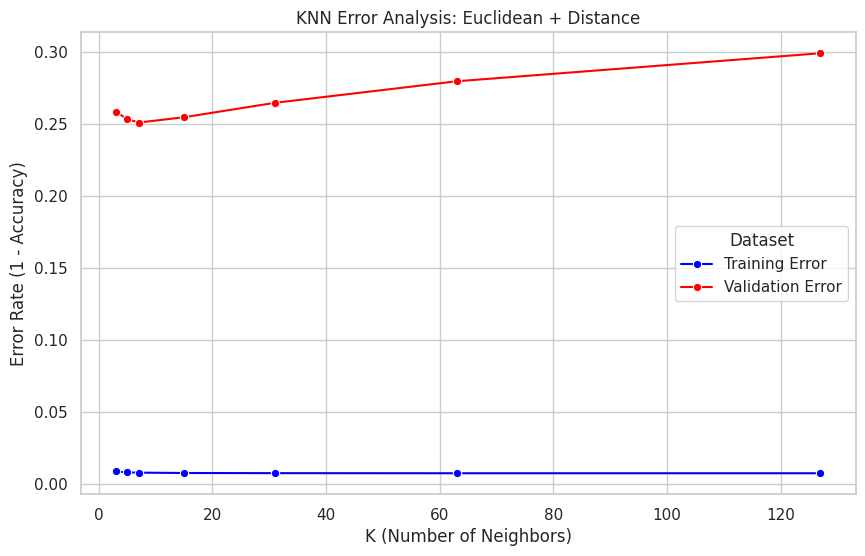

In [6]:

# 1. Caricamento Dati
with open('../../models/tuning/knn_tuning.json', 'r') as f:
    data = json.load(f)

# 2. Estrazione e Filtraggio (Metric: Euclidean, Weights: Distance)
# Calcoliamo Errore = 1 - Mean Score
parsed_data = []
for entry in data['all_combinations']:
    params = entry['params']
    if params['metric'] == 'euclidean' and params['weights'] == 'distance':
        parsed_data.append({
            'K': params['n_neighbors'],
            'Training Error': 1 - entry['mean_train_score'],
            'Validation Error': 1 - entry['mean_test_score']
        })

# 3. Creazione DataFrame e Reshape per Seaborn
df = pd.DataFrame(parsed_data)
# Melt trasforma le colonne in righe per permettere a Seaborn di gestire la legenda (hue)
df_melted = df.melt(id_vars='K', var_name='Dataset', value_name='Error Rate')

# 4. Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_melted, 
    x='K', 
    y='Error Rate', 
    hue='Dataset', 
    marker='o',
    palette=['blue', 'red'] # Train=Blue, Val=Red (standard convenzionale)
)

plt.title('KNN Error Analysis: Euclidean + Distance')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xlabel('K (Number of Neighbors)')
plt.show()

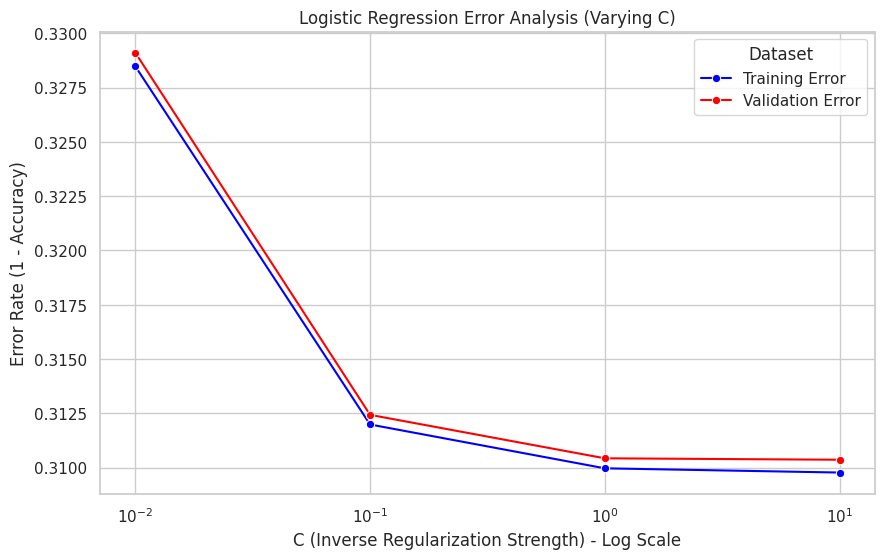

In [11]:
# 1. Caricamento Dati
with open('../../models/tuning/logistic_regression_tuning.json', 'r') as f:
    data = json.load(f)

# 2. Estrazione Dati (Variando C)
parsed_data = []
for entry in data['all_combinations']:
    # Dato che solver e class_weight sono costanti nel tuo file, prendiamo tutto
    parsed_data.append({
        'C': entry['params']['C'],
        'Training Error': 1 - entry['mean_train_score'],
        'Validation Error': 1 - entry['mean_test_score']
    })

# 3. Creazione DataFrame
df = pd.DataFrame(parsed_data)
df_melted = df.melt(id_vars='C', var_name='Dataset', value_name='Error Rate')

# 4. Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_melted, 
    x='C', 
    y='Error Rate', 
    hue='Dataset', 
    marker='o',
    palette=['blue', 'red']
)

# Impostazioni Scientifiche
plt.xscale('log')  # Fondamentale per vedere bene 0.01 vs 10
plt.title('Logistic Regression Error Analysis (Varying C)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xlabel('C (Inverse Regularization Strength) - Log Scale')

plt.show()

In [ ]:
with open('../../models/tuning/svm_tuning.json', 'r') as f:
    data = json.load(f)

# 2. Parsing e Preprocessing
parsed_data = []
for entry in data['all_combinations']:
    p = entry['params']
    parsed_data.append({
        'C': p['C'],
        'gamma': p['gamma'],
        'Score': entry['mean_test_score']
    })

df = pd.DataFrame(parsed_data)

# 3. Feature Engineering per Visualization
# Convertiamo i valori raw in stringhe formattate "2^x" per leggibilità
# Usiamo np.isclose per gestire eventuali imprecisioni float
df['log_C'] = df['C'].apply(lambda x: f"$2^{{{int(np.round(np.log2(x)))}}}$")
df['log_gamma'] = df['gamma'].apply(lambda x: f"$2^{{{int(np.round(np.log2(x)))}}}$")

# 4. Creazione Pivot Table
# Index (Y) = Gamma, Columns (X) = C
heatmap_data = df.pivot(index='log_gamma', columns='log_C', values='Score')

# 5. Sorting degli Indici (Cruciale per assi non numerici)
# Estraiamo l'esponente intero dalla stringa per ordinare correttamente
sort_key_idx = lambda x: int(x.split('{')[1].split('}')[0])
heatmap_data = heatmap_data.reindex(
    index=sorted(heatmap_data.index, key=sort_key_idx),
    columns=sorted(heatmap_data.columns, key=sort_key_idx)
)

# 6. Plotting
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="viridis", # O 'RdYlGn'
    cbar_kws={'label': 'Mean Validation Accuracy'},
    linewidths=0.5,
    square=True
)

# Invertiamo asse Y per avere gamma basso in basso (Cartesiano standard)
ax.invert_yaxis()

plt.title('SVM (RBF Kernel) Hyperparameter Landscape')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Kernel Coefficient $\gamma$')

plt.tight_layout()
plt.show()

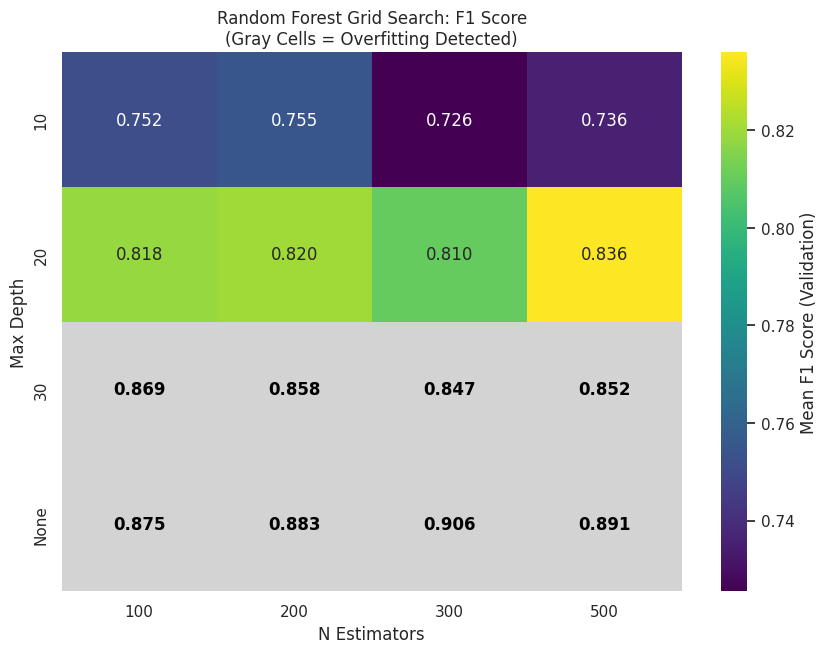

In [15]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# --- 1. MOCK DATA GENERATION (Struttura Random Forest) ---
data = {'all_combinations': []}
n_estimators_range = [100, 200, 300, 500]
max_depth_range = [10, 20, 30, None] # None usually implies full depth

for n in n_estimators_range:
    for d in max_depth_range:
        d_val = 50 if d is None else d # Treat None as deep tree
        
        # Logica simulata:
        # Alta profondità = Alto F1 (ma rischio Overfitting)
        # Bassa profondità = F1 medio (Underfitting)
        base_score = 0.6 + (0.3 * (1 - np.exp(-d_val/15))) 
        f1_score = base_score + np.random.normal(0, 0.01)
        
        # Overfitting trigger: Profondità alta e molti estimatori
        is_overfit = False
        if d_val > 20: 
            is_overfit = True
            
        data['all_combinations'].append({
            'params': {'n_estimators': n, 'max_depth': d},
            'mean_test_score': f1_score, # Questo è l'F1
            'is_overfitting': is_overfit
        })
# ---------------------------------------------------------

# 2. Data Processing
rows = []
for entry in data['all_combinations']:
    p = entry['params']
    rows.append({
        'n_estimators': p['n_estimators'],
        'max_depth': str(p['max_depth']) if p['max_depth'] is not None else "None",
        'F1 Score': entry['mean_test_score'],
        'Overfitting': entry['is_overfitting']
    })

df = pd.DataFrame(rows)

# Creiamo DUE matrici pivot: una per i valori, una per il booleano
pivot_f1 = df.pivot(index='max_depth', columns='n_estimators', values='F1 Score')
pivot_overfit = df.pivot(index='max_depth', columns='n_estimators', values='Overfitting')

# Riordiniamo l'indice Y per logica (10 -> 20 -> 30 -> None)
custom_order = [str(x) for x in max_depth_range if x is not None] + ["None"]
pivot_f1 = pivot_f1.reindex(custom_order)
pivot_overfit = pivot_overfit.reindex(custom_order)

# 3. Plotting Layered Heatmap
plt.figure(figsize=(10, 7))
sns.set_theme(style="white")

# LAYER A: La zona di Overfitting (Sfondo)
# Usiamo una colormap piatta (es. Grigio scuro o Rosso desaturato)
# Maschera: Nascondiamo le celle che NON sono overfitting (~pivot_overfit)
sns.heatmap(
    pivot_f1, 
    mask=~pivot_overfit,  # Mostra solo dove Overfitting è TRUE
    cmap=mcolors.ListedColormap(['#d3d3d3']), # Grigio "Danger Zone"
    annot=True, 
    fmt=".3f", 
    cbar=False,           # Niente colorbar per questo layer
    annot_kws={'color': 'black', 'weight': 'bold'} # Testo scuro
)

# LAYER B: La zona di Validità (F1 Score Gradient)
# Maschera: Nascondiamo le celle che SONO overfitting (pivot_overfit)
ax = sns.heatmap(
    pivot_f1, 
    mask=pivot_overfit,   # Mostra solo dove Overfitting è FALSE
    cmap="viridis",       # Gradiente normale per le performance
    annot=True, 
    fmt=".3f",
    cbar_kws={'label': 'Mean F1 Score (Validation)'}
)

# Opzionale: Aggiungere un pattern o bordo per evidenziare ulteriormente
# (Seaborn base non supporta hatching nativo sulle celle facilmente, il colore è sufficiente)

plt.title('Random Forest Grid Search: F1 Score\n(Gray Cells = Overfitting Detected)')
plt.ylabel('Max Depth')
plt.xlabel('N Estimators')

plt.show()